In [1]:
pip install matplotlib numpy pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import math

In [4]:
metal = "stal"
plik = f"pomiary_{metal}.csv"
df = pd.read_csv(plik)


dlugosc = {"miedz":772.5, "mosiadz":772.4, "stal":771.1}
pret = {"miedz":"pręta miedzianego", "mosiadz":"pręta mosiężnego", "stal":"pręta stalowego"}

df.head(10)

,T,L
0,0.0,0.00
1,4.6,0.05
2,9.3,0.10
3,14.2,0.14
4,18.9,0.19
5,23.8,0.23
6,28.3,0.28
7,32.8,0.32
8,37.8,0.37


In [6]:

# Number of data points
n = 9

# data
x = df["T"]
y = df["L"]

print(plik)

# Calculate linear regression with forced intercept = 0
degrees = [1] # model y = ax; b=0
matrix = np.stack([x**d for d in degrees], axis=-1)
result = np.linalg.lstsq(matrix,y,rcond=None)

a = result[0][0]
b = 0
residuals = result[1][0]

blad_a = math.sqrt((residuals * n) / ((n-2)*(n*sum(x**2) - (sum(x))**2)))

print(f"współczynnik kierunkowy a: {a}")
print("b: ", b)
print(f"błąd wsp. kierunkowego a: {blad_a}", )

L0 = dlugosc[metal]
alpha = a / L0

print(f"alpha: {alpha}")

d_deltaL = 0.01
d_deltaT = 0.1
d_L0 = 0.2

blad_alpha = (d_deltaL/y[1] + d_L0/L0 + d_deltaT/x[1])*alpha
print(f"błąd alpha: {blad_alpha}")

pomiary_stal.csv
współczynnik kierunkowy a: 0.009831200107524276
b:  0
błąd wsp. kierunkowego a: 0.00012295995620248228
alpha: 1.274957866362894e-05
błąd alpha: 2.8303873410783295e-06


In [7]:
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='b',
                     edgecolor='none', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor, zorder=2)

    # Add collection to axes
    ax.add_collection(pc)

    # Plot errorbars
    artists = ax

    return artists

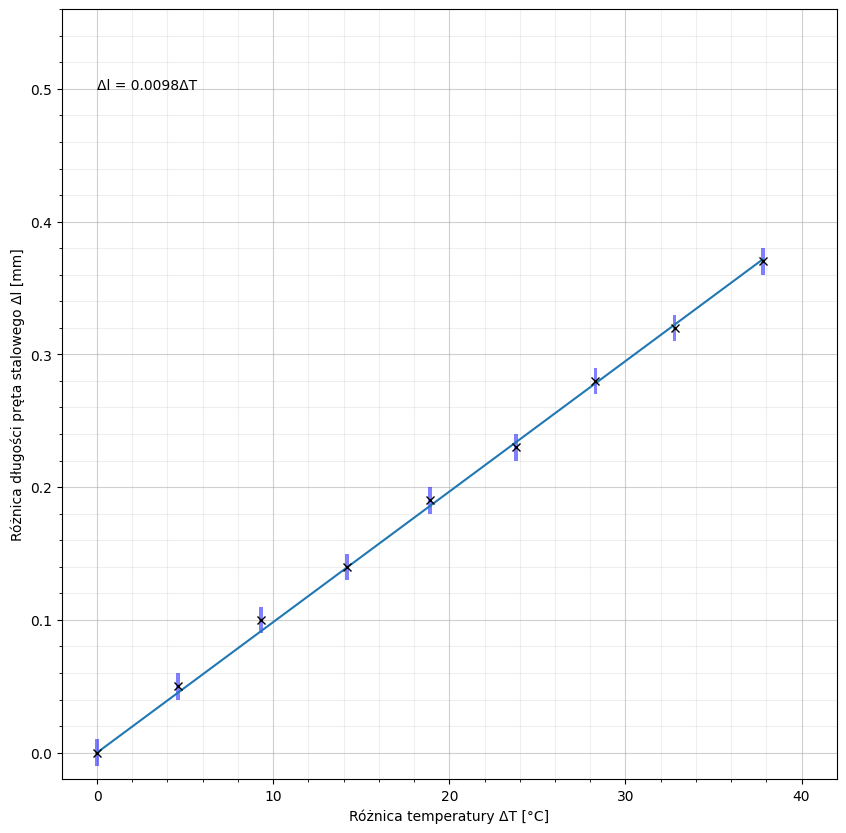

In [8]:
xerr = np.ones((2,n))*0.1
yerr = np.ones((2,n))*0.01

# Create figure and axes
fig, ax = plt.subplots(1)

# Set plot size
fig.set_figwidth(10) 
fig.set_figheight(10)

# Grid
# X axis
major_xtick_spacing = 10
minor_xtick_spacing = 2
xmin = 0
xmax = 40

major_xticks = np.arange(xmin,xmax+minor_xtick_spacing,major_xtick_spacing)
minor_xticks = np.arange(xmin,xmax,minor_xtick_spacing)

# Y axis
major_ytick_spacing = 0.1
minor_ytick_spacing = 0.02
ymin = 0
ymax = 0.56

major_yticks = np.arange(ymin,ymax,major_ytick_spacing)
minor_yticks = np.arange(ymin,ymax,minor_ytick_spacing)

ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.6)


# Call function to create error boxes
_ = make_error_boxes(ax, x, y, xerr, yerr)

plt.plot(x,a*x+b)  # plot regression line
plt.plot(x,y,'kx') # plot measurement points
plt.axis([xmin-minor_xtick_spacing,xmax+minor_xtick_spacing, ymin-minor_ytick_spacing,ymax])

# Adding labels
ax.set_xlabel("Różnica temperatury ΔT [°C]")
ax.set_ylabel(f"Różnica długości {pret[metal]} Δl [mm]")
plt.text(0,0.5, f"Δl = {a:.4f}ΔT")

plt.savefig(f"wykres_{metal}.svg",format="svg")
plt.show()